In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
import warnings
warnings.filterwarnings(action='ignore')
from statsmodels.tsa.seasonal import seasonal_decompose
import statsmodels.formula.api as formula
from statsmodels.stats.outliers_influence import variance_inflation_factor
import statsmodels as sm
from sklearn import preprocessing
from sklearn.model_selection import train_test_split,GridSearchCV,RandomizedSearchCV
from sklearn.linear_model import LinearRegression,Lasso,Ridge
#from sklearn.externals import joblib
from sklearn.metrics import r2_score,mean_squared_error
from sklearn.ensemble import RandomForestRegressor,GradientBoostingRegressor
from sklearn.tree import DecisionTreeRegressor
from IPython.display import display
from sklearn import metrics

In [2]:
data = pd.read_excel (r'C:\Users\Kira\Desktop\Internship\Data\Delhi_Data-20210529T043217Z-001\Delhi_Data\2013-2020-RK-PURAM-final-dataset\3y_weekly_RKPURAM.xlsx')
data['From Date']=pd.to_datetime(data['From Date'])
data['year'] = data['From Date'].dt.year
data['month'] = data['From Date'].dt.month
data['day'] = data['From Date'].dt.day

In [3]:
import datetime as dt

In [4]:
data['From Date']= data['From Date'].map(dt.datetime.toordinal)

In [5]:
df=data.loc['0':'207']

In [6]:
df.columns

Index(['From Date', 'PM2.5y1', 'PM1y1', 'NOy1', 'NO2y1', 'NOxy1', 'NH3y1',
       'SO2y1', 'COy1', 'Ozoney1', 'RHy1', 'WSy1', 'WDy1', 'SRy1', 'BPy1',
       'ATy1', 'PM2.5y2', 'PM1y2', 'NOy2', 'NO2y2', 'NOxy2', 'NH3y2', 'SO2y2',
       'COy2', 'Ozoney2', 'RHy2', 'WSy2', 'WDy2', 'SRy2', 'BPy2', 'ATy2',
       'PM2.5y3', 'PM1y3', 'NOy3', 'NO2y3', 'NOxy3', 'NH3y3', 'SO2y3', 'COy3',
       'Ozoney3', 'RHy3', 'WSy3', 'WDy3', 'SRy3', 'BPy3', 'ATy3', 'PM2.5',
       'PM1', 'NO', 'NO2', 'NOx', 'NH3', 'SO2', 'CO', 'Ozone', 'RH', 'WS',
       'WD', 'SR', 'BP', 'AT', 'year', 'month', 'day'],
      dtype='object')

In [7]:
X1 = df[['NOy1','NOy2','NOy3','year', 'month', 'day']]
Y1 = df['NO']

In [41]:
xtrain,xtest,ytrain,ytest = train_test_split(X1,Y1,test_size=.2,random_state=2)

In [62]:
grad_boost = GradientBoostingRegressor(n_estimators=1500,
                                      max_depth=12,
                                      max_features='log2',
                                      min_samples_split=2,
                                      min_samples_leaf=4,
                                      learning_rate=0.01)

grad_boost.fit(xtrain,ytrain)

GradientBoostingRegressor(learning_rate=0.01, max_depth=12, max_features='log2',
                          min_samples_leaf=4, n_estimators=1500)

In [63]:
# we now score the model
print('Score on train data: {}\n'.format(grad_boost.score(xtrain,ytrain)))
print('Score on test data: {}\n'.format(grad_boost.score(xtest,ytest)))

gboost_pred = grad_boost.predict(xtest)
gboost_mse = mean_squared_error(ytest,gboost_pred)
gboost_accuracy = r2_score(ytest,gboost_pred)

print('Root Mean Squared Error: {}\n'.format(np.sqrt(gboost_mse)))
print('Overall model accuracy: {}'.format(gboost_accuracy))

Score on train data: 0.999659218723817

Score on test data: 0.7117645967047124

Root Mean Squared Error: 26.391580054160574

Overall model accuracy: 0.7117645967047124


In [64]:
test=data.loc['207':'259']
X=test[['NOy1','NOy2','NOy3','year', 'month', 'day']]

X

,NOy1,NOy2,NOy3,year,month,day
207,125.535714,80.651429,100.627143,2019,12,29
208,109.870000,174.377143,98.832857,2020,1,5
209,84.832857,75.938571,101.944286,2020,1,12
210,117.140000,71.592857,94.412857,2020,1,19
211,34.865714,74.328571,49.015714,2020,1,26
212,47.905714,32.171429,74.012857,2020,2,2
213,65.595714,112.367143,153.021429,2020,2,9
214,73.142857,35.207143,50.672857,2020,2,16
215,68.825714,122.750000,34.234286,2020,2,23
216,86.743571,79.125714,38.925714,2020,3,1


In [65]:
predict=grad_boost.predict(X)

In [66]:
predict

array([31.44986318, 86.5308726 , 90.12739575, 83.58578649, 85.08169036,
       58.91516761, 63.41134346, 52.75761139, 77.04863439, 76.5396227 ,
       57.47778254, 55.51305401, 59.57176992, 69.57728177, 78.73687937,
       60.795235  , 53.19030697, 68.81092567, 57.97823333, 58.77684062,
       61.98682137, 74.44116239, 63.35985032, 25.82024547, 28.84646634,
       28.17348588, 29.00735613,  5.86034035, 20.80636534, 13.6723244 ,
       25.11187874, 15.57414549, 10.07945654, 16.55787082, 18.43936298,
       20.93053196,  7.39578434, 10.38840134, 11.77566386, 77.92211108,
       73.53279065, 84.56637625, 87.91086502, 81.74716142, 80.33768772,
       71.05056928, 66.56570517, 83.22726665, 76.67039839, 51.97107843,
       82.66742817, 85.89326294, 91.41039999])

In [67]:
dates=data.loc['207':'259','From Date']

In [68]:
X['From Date']=dates.values

In [69]:
X.columns

Index(['NOy1', 'NOy2', 'NOy3', 'year', 'month', 'day', 'From Date'], dtype='object')

In [70]:
X['From Date']= X['From Date'].map(dt.datetime.fromordinal)

In [71]:
test['From Date']= test['From Date'].map(dt.datetime.fromordinal)

In [72]:
test = test.set_index(['From Date'])
X = X.set_index(['From Date'])


In [73]:
X['pred']=predict

<AxesSubplot:xlabel='From Date'>

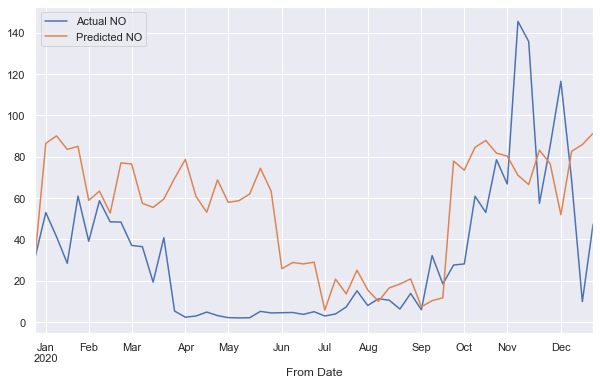

In [74]:
test['NO'].plot(legend=True, label='Actual NO', figsize=(10,6))
X['pred'].plot(legend=True, label='Predicted NO')

In [75]:
np.sqrt(mean_squared_error(test['NO'],X['pred']))

39.64531156243617

In [76]:
mae = metrics.mean_absolute_error(ytest, gboost_pred)
mse = metrics.mean_squared_error(ytest, gboost_pred)
rmsetest = np.sqrt(mse) # or mse**(0.5)  
r2 = metrics.r2_score(ytest,gboost_pred)

print("Results of sklearn.metrics:")
print("MAE:",mae)
print("MSE:", mse)
print("RMSE:", rmsetest)
print("R-Squared:", r2)

Results of sklearn.metrics:
MAE: 20.378146458384464
MSE: 696.5154977551663
RMSE: 26.391580054160574
R-Squared: 0.7117645967047124


In [77]:
mae = metrics.mean_absolute_error(test['NO'],X['pred'])
mse = metrics.mean_squared_error(test['NO'],X['pred'])
rmse = np.sqrt(mse) # or mse**(0.5)  
r2 = metrics.r2_score(test['NO'],X['pred'])

print("Results of sklearn.metrics:")
print("MAE:",mae)
print("MSE:", mse)
print("RMSE:", rmse)
print("R-Squared:", r2)

Results of sklearn.metrics:
MAE: 31.852279149027996
MSE: 1571.7507288826353
RMSE: 39.64531156243617
R-Squared: -0.36461903791861605


In [78]:
import pickle
filename = 'NO_gboost3y.sav'
pickle.dump(grad_boost, open(filename, 'wb'))

In [79]:
#load model
loaded_model = pickle.load(open(filename, 'rb'))
result = loaded_model.score(xtest, ytest)
print(result)

0.7117645967047124


# 3rd plot

In [80]:
testcase = pd.DataFrame()

In [81]:
testcase['test']=ytest
testcase['pred']=gboost_pred

In [82]:
testcase["Corrected"] = np.where(testcase["pred"]<testcase["test"],testcase["pred"]+rmsetest ,
                   np.where(testcase["pred"]>testcase["test"], testcase["pred"]-rmsetest,
                            testcase["pred"]))

In [83]:
testcase

,test,pred,Corrected
154,148.477143,104.182967,130.574547
192,1.497143,13.719535,-12.672045
135,13.640000,20.008241,-6.383339
10,191.662857,137.715718,164.107298
13,82.768571,99.505602,73.114022
173,44.565714,51.947185,25.555605
205,64.480000,70.405819,44.014239
23,6.577143,12.032678,-14.358902
71,16.555714,41.470456,15.078876
28,26.344286,8.692550,35.084131


In [84]:
'''testcase['test'].plot(legend=True, label='Actual PM2.5', figsize=(10,6))
testcase['pred'].plot(legend=True, label='Predicted PM2.5')
testcase["Corrected"].plot(legend=True, label='Corrected PM2.5')'''

'testcase[\'test\'].plot(legend=True, label=\'Actual PM2.5\', figsize=(10,6))\ntestcase[\'pred\'].plot(legend=True, label=\'Predicted PM2.5\')\ntestcase["Corrected"].plot(legend=True, label=\'Corrected PM2.5\')'

In [85]:
r2 = metrics.r2_score(testcase["Corrected"],testcase['test'])
r2

0.8756643770613793

In [86]:
test2020=pd.DataFrame()

In [87]:
test2020['test']=test['NO']
test2020['pred']=X['pred']

In [88]:
test2020.index=test.index

In [89]:
test2020["Corrected"] = np.where(test2020["pred"]<test2020["test"],test2020["pred"]+rmsetest ,
                   np.where(test2020["pred"]>test2020["test"], test2020["pred"]-rmsetest,
                            test2020["pred"]))

<AxesSubplot:xlabel='From Date'>

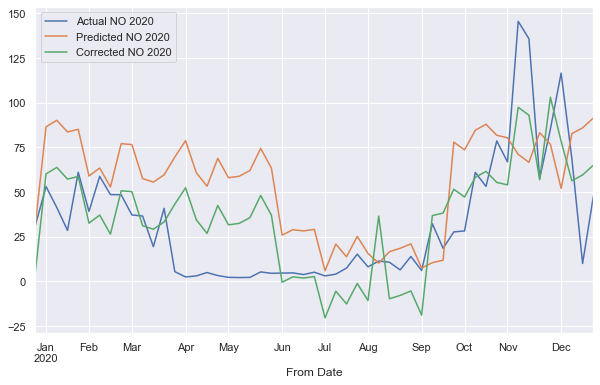

In [90]:
test2020['test'].plot(legend=True, label='Actual NO 2020', figsize=(10,6))
test2020['pred'].plot(legend=True, label='Predicted NO 2020')
test2020["Corrected"].plot(legend=True, label='Corrected NO 2020')

In [91]:
r2020 = metrics.r2_score(test2020["Corrected"],test2020['test'])
r2020

0.3331122325611937